# Crime Analytics: Visualization of Incident Reports

In this assignment, I will analyze criminal incident data from San Francisco to visualize patterns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [15]:
sf_db = pd.read_csv('sanfrancisco_incidents_summer_2014.csv',parse_dates = ['Date'])

In [17]:
sf_db.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [24]:
# the date and time of incident are in two separate columns
# combining them into a date_time column
sf_db['date_time'] = pd.to_datetime(sf_db['Date'].apply(str) + ' ' + sf_db['Time'])
date_idx = pd.DatetimeIndex(sf_db['date_time'])
sf_db['incident_date'] = date_idx.date.astype('datetime64')
sf_db['incident_hour'] = date_idx.hour
sf_db['incident_year'] = date_idx.year
sf_db['incident_month'] = date_idx.month
sf_db['incident_weekday'] = date_idx.weekday

## Crime rate and frequency 

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  import sys


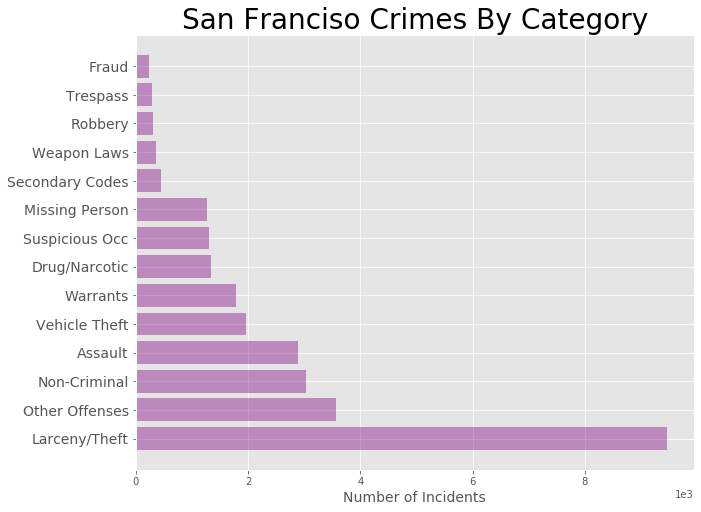

In [57]:
crime_incident = sf_db['Category'].value_counts()

#plot the bar chart 
y_pos = np.arange(len(crime_incident[0:14].keys()))

plt.figure(figsize=(10,8))
plt.barh(y_pos, crime_incident[0:14].get_values(),align='center',alpha=0.4,color = 'purple')
plt.yticks(range(len(crime_incident[0:14].keys())), map(lambda x: x.title(), crime_incident[0:14].keys()), fontsize= 14)
plt.xlabel('Number of Incidents', fontsize = 14)
plt.title('San Franciso Crimes By Category', fontsize =28)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## Crime By District

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  import sys


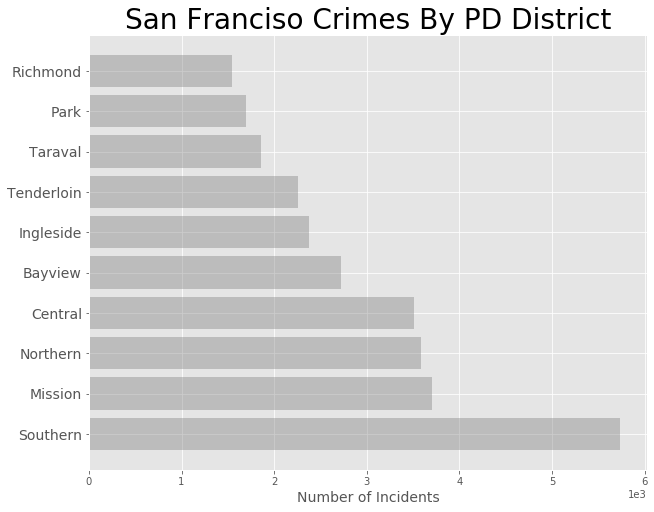

In [60]:
crime_district = sf_db['PdDistrict'].value_counts()

#plot the bar chart 
y_pos = np.arange(len(crime_district[0:10].keys()))

plt.figure(figsize=(10,8))
plt.barh(y_pos, crime_district[0:14].get_values(),align='center',alpha=0.4,color = 'grey')
plt.yticks(range(len(crime_district[0:14].keys())), map(lambda x: x.title(), crime_district[0:14].keys()), fontsize= 14)
plt.xlabel('Number of Incidents', fontsize = 14)
plt.title('San Franciso Crimes By PD District', fontsize =28)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## Crime by day of week 

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  import sys
C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.


Text(0.5, 1.0, 'San Franciso Crime Occurence by Day Of Week')

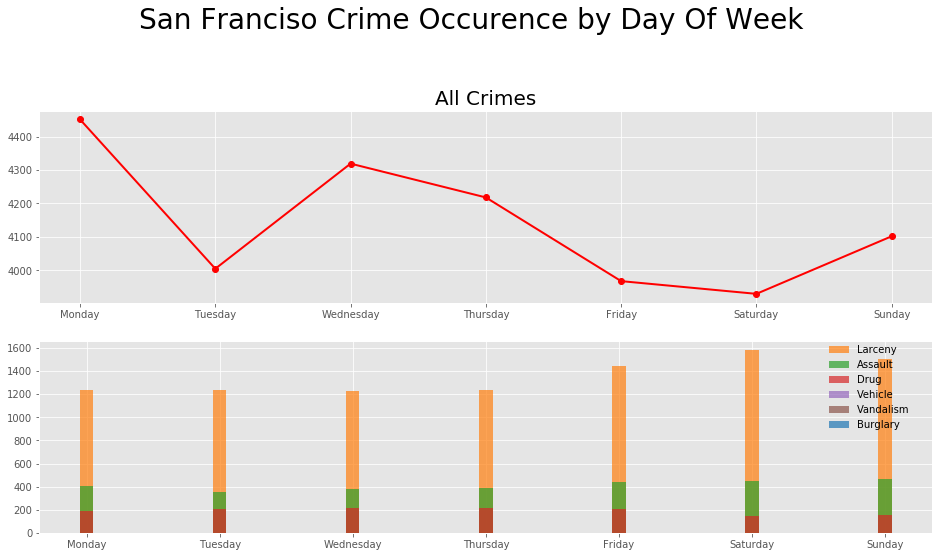

In [54]:
pylab.rcParams['figure.figsize'] = (16.0, 12.0)

plt.style.use('ggplot')

daysOfWeekIdx = sanfran_db.groupby('DayOfWeek').size().keys()
daysOfWeekLit = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
occursByWeek = sanfran_db.groupby('DayOfWeek').size().get_values()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(daysOfWeekIdx, occursByWeek, 'ro-', linewidth=2)
ax1.set_xticklabels(daysOfWeekLit)
ax1.set_title ('All Crimes', fontsize=20)
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Bar plot
y = np.empty([6,7])
h = [None]*6
width = 0.1

ax2 = plt.subplot2grid((3,3), (1,0), colspan=3)

#
y[0] = larceny.groupby('DayOfWeek').size().get_values()
y[1] = assault.groupby('DayOfWeek').size().get_values()
y[2] = drug.groupby('DayOfWeek').size().get_values()

color_sequence = ['#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b','#1f77b4']

for i in range(0,6):
    h[i] = ax2.bar(daysOfWeekIdx, y[i], width, color=color_sequence[i], alpha = 0.7)

ax2.set_xticks(daysOfWeekIdx)
ax2.set_xticklabels(daysOfWeekLit)
# ensure that ticks are only at the bottom and left parts of the plot
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()

ax2.legend((item[0] for item in h), 
           ('Larceny', 'Assault', 'Drug', 'Vehicle', 'Vandalism', 'Burglary'), 
           bbox_to_anchor=(0.88, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'San Franciso Crime Occurence by Day Of Week',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)


## Crime by Hours 

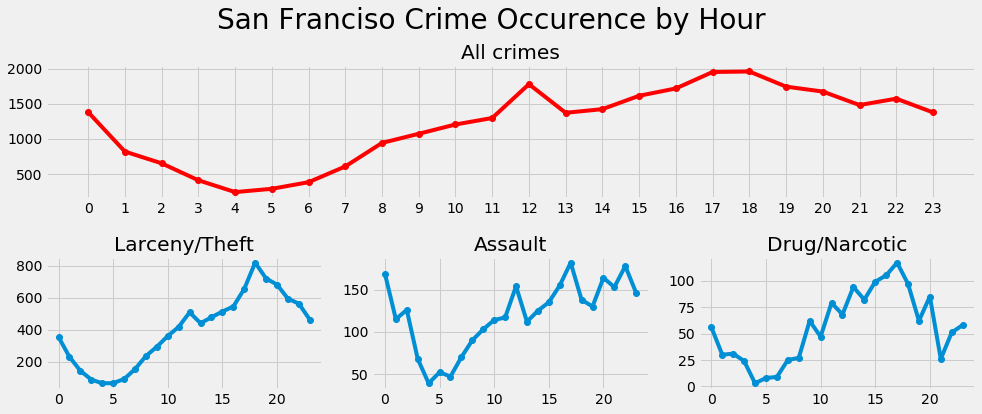

In [36]:
import pylab
import numpy as np

pylab.rcParams['figure.figsize'] = (14.0, 8.0)

sf_db.set_index(sanfran_db["Date"],inplace=True)

sf_db['DayOfWeek'] = sf_db.index.dayofweek
sf_db['Time'] =pd.to_datetime(sf_db['Time'])
sf_db['Hour'] = sf_db.Time.dt.hour
sf_db['Month'] = sf_db.index.month
sf_db['Year'] = sf_db.index.year
sf_db['DayOfMonth'] = sf_db.index.day

# #choose to plot the top 5 crimes
larceny = sf_db[sf_db['Category'] == "LARCENY/THEFT"]
assault = sf_db[sf_db['Category'] == "ASSAULT"]
drug = sf_db[sf_db['Category'] == "DRUG/NARCOTIC"]

with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
    ax1.plot(sf_db.groupby('Hour').size(), 'ro-')
    ax1.set_title ('All crimes')
    ax1.xaxis.set_ticks(np.arange(0, 24, 1))
    
    ax2 = plt.subplot2grid((3,3), (1, 0))
    ax2.plot(larceny.groupby('Hour').size(), 'o-')
    ax2.set_title ('Larceny/Theft')
    
    ax3 = plt.subplot2grid((3,3), (1, 1))
    ax3.plot(assault.groupby('Hour').size(), 'o-')
    ax3.set_title ('Assault')
    
    ax4 = plt.subplot2grid((3,3), (1, 2))
    ax4.plot(drug.groupby('Hour').size(), 'o-')
    ax4.set_title ('Drug/Narcotic')
  
    pylab.gcf().text(0.5, 1.03, 
                    'San Franciso Crime Occurence by Hour',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout(2)

## Crime by Year 2014

Text(0.5, 1.0, 'San Franciso Crimes Trend by Month&Year')

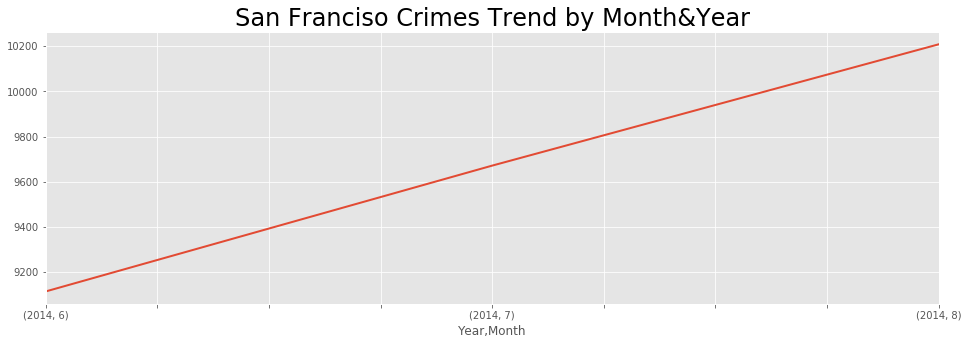

In [49]:
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
yearMonth = sf_db.groupby(['Year','Month']).size()
ax = yearMonth.plot(lw=2)
plt.title('San Franciso Crimes Trend by Month&Year', fontsize=24)


## Crime by Month 

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """
C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.


Text(0.5, 1.0, 'San Franciso Crime Occurence by Month')

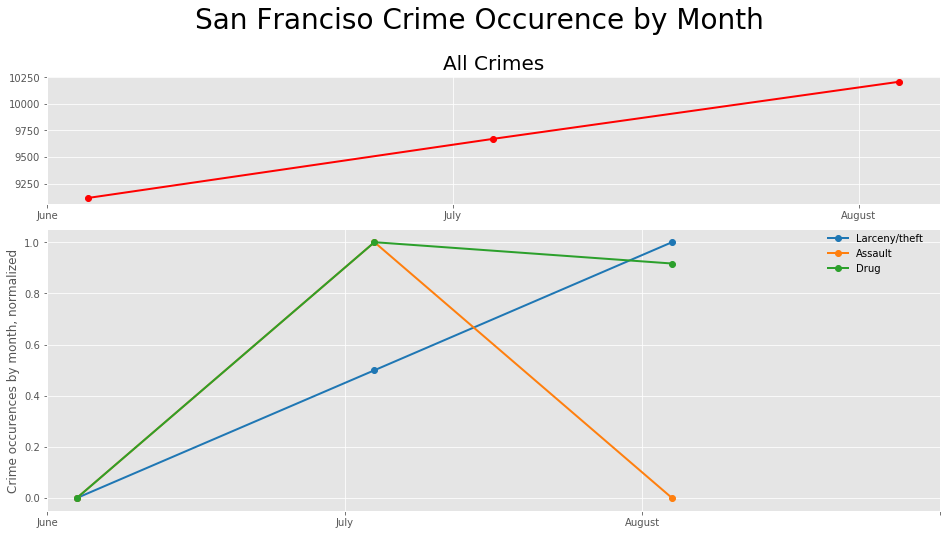

In [48]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

monthsIdx = sf_db.groupby('Month').size().keys() - 1
monthsLit = ['June', 'July','August']
occursByMonth = sf_db.groupby('Month').size().get_values()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(monthsIdx, occursByMonth, 'ro-', linewidth=2)
ax1.set_xticklabels(monthsLit)
ax1.set_title ('All Crimes', fontsize=20)
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 1))

# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Linear normalized plot for 6 top crimes 
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2)

y = np.empty([6,3])
y[0] = larceny.groupby('Month').size().get_values()
y[1] = assault.groupby('Month').size().get_values()
y[2] = drug.groupby('Month').size().get_values()

crimes = ['Larceny/theft', 'Assault', 'Drug']
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i in range(0,3):
    y[i]= (y[i]-min(y[i]))/(max(y[i])-min(y[i]))  # normalization
    h[i] = ax2.plot(monthsIdx, y[i],'o-', color=color_sequence[i], lw=2)

ax2.set_ylabel("Crime occurences by month, normalized")

ax2.xaxis.set_ticks(np.arange(start, end+1, 1))
ax2.set_xticklabels(monthsLit)

ax2.legend((item[0] for item in h), 
           crimes, 
           bbox_to_anchor=(0.87, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'San Franciso Crime Occurence by Month',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)